# Всем привет!

## Спасибо что заглянули в этот ноутбук :)

## Оглавление
* [Структура проекта](#структура-проекта)
* [Первая гипотеза](#первая-гипотеза)
	* [Статистика](#статистика)
	* [Интерпретация результата](#интерпретируем-результат)
	* [Вывод в CSV](#выведем-результаты-нашего-исследования-в-csv-табличку)
* [Структура проекта](#вторая-гипотеза)
	* [Статистика](#статистика)
	* [Результат](#результат)


### Структура проекта
* Файл **main**(мы сейчас в нем :blush:) используется для обработки результатов статистических выводов. 
* Файл **Streamlitapp** создает дашборд, используя(:heavy_exclamation_mark:) Streamlit.
* Файл **cohort_Statistics** подсчитывает статистику для определенного предмета, года и класса.
* Файл **DfServices** собрал в себя все тяжелые функции, использование которых в **cohort_statistics** уменьшало бы понятность кода :).
Например, получает базы данных, приводит их к необходимому формату, получает когорты участников ВСОШ
* В папке **Data** по каждому предмету и году лежат файлы:
    * PDF и Excel - так предоставляли данные организаторы олимпиад
    * Скрипты, для парсинга и форматирования этих данных
    * Ну и собственно готовые данные в формате CSV

### Первая гипотеза

Напомню:   
$H_1$: **Средний балл призеров прошлого года будет выше**   


#### Статистика

Для начала **соберем датасет** с результатами статистики по всем предметам, годам и классам:

In [5]:
%%capture
from Cohort_Statistics import Cohort_Statistics

data = {
    'subjectName': [],
    'year': [],
    'grade': [],
    'result': []
}
for subjectName in ['Math', 'Economics', 'Physics']:
    for year in [23, 24]:
        for grade in [10, 11]:
            # Получим результат:
            result = Cohort_Statistics.cohortStat(Cohort_Statistics.getMeanData(grade, year, subjectName))[1] 
            #                           [1], т.к. cohort_Stat возвращает кортеж, где 2й элемент это результат
            # И добавим результат в data.
            data['subjectName'].append(subjectName)
            data['year'].append(year)
            data['grade'].append(grade)
            data['result'].append(result)

Переведем **Dict** в удобный формат - **pd.DataFrame**

In [6]:
import pandas as pd
dFrame = pd.DataFrame(data)
print(dFrame.head())

  subjectName  year  grade result
0        Math    23     10   True
1        Math    23     11   True
2        Math    24     10   True
3        Math    24     11   True
4   Economics    23     10   True


Первым делом, хотелось бы проверить, в каких случаях увеличение среднего значения у призеров оказалось недостоверным.

In [7]:
%%capture
print(dFrame[dFrame['result'] == 'Not defined'])

#### Интерпретируем результат:

* У **математиков** все 4 выборки показали статистически значимый результат.    
* У **экономистов** 3 из 4х выборок показали статистически значимый результат
* В то же время у **физиков** лишь 1 из 4х выборок показала статистически значимый результат.

##### По экономике у меня есть интересная информация: 
* Во ВСОШ 22-23 года в заданиях 11 класса было аж **4 качественные задачи** ([Задания 1, 3](https://всош.цпм.рф/upload/files/Arhive_tasks/2022-23/final/econ/sol-econ-11-tur1-final-22-23.pdf), [5, 6](https://всош.цпм.рф/upload/files/Arhive_tasks/2022-23/final/econ/sol-econ-11-tur2-final-22-23.pdf)) **против двух**, как во ВСОШах по каждому классу в 20-21, 21-22, 22-23, 23-24 годах.
* В количественных же заданиях были достаточно простые темы:
    * Спрос и предложение, максимизация прибыли для одной фирмы [Задание 2](https://всош.цпм.рф/upload/files/Arhive_tasks/2022-23/final/econ/sol-econ-11-tur1-final-22-23.pdf)
    * Модель штакельберга (олигополия двух фирм) [Задание 4](https://всош.цпм.рф/upload/files/Arhive_tasks/2022-23/final/econ/sol-econ-11-tur1-final-22-23.pdf)
    * Математическое ожидание [Задание 7](https://всош.цпм.рф/upload/files/Arhive_tasks/2022-23/final/econ/sol-econ-11-tur2-final-22-23.pdff)
    * Монополия и трансферы государства [Задание 8](https://всош.цпм.рф/upload/files/Arhive_tasks/2022-23/final/econ/sol-econ-11-tur2-final-22-23.pdf)

Что привело к появлению соревнования больше по описанию эссе и пониманию экономики, нежели к решению на нее каких то сложных математических задач.   
   
_По инсайтам, которые у меня есть, изменения были введены командой составителей для того, чтобы победить засилие олимпиадных математиков на ВСОШ по экономике. Задания 11 класса стали экспериментом._   
   
Это изменение могло повлиять на нашу статистику. </details>
Поэтому не будем учитывать в исследовании выборку по экономике 22-23 года 11 класса
   
   **Замечу, что мы не можем делать какие либо выводы по имеющимся у нас данным.**    
На результаты в разных годах и предметах также могли повлиять следующие факторы:
* Маленький размер выборок(В районе 250 участников ВСОШ по каждому предмету в год и только 40 призеров)
* Задания регионального этапа, которые влияют на уровень людей, проходящих на заключительный этап
* Олимпиадные школы по подготовке к олимпиадам могли готовить людей в разные года с разной эффективностью
* И великое множество других

Также кажется странным, что из четырех выборок по физике только одна показала статистически значимый результат.      
Требуется дополнительное исследование, выявляющее, действительно ли в физике все совсем по другому и, если так, то почему?


И, конечно, подготовим выводы для нашего исследования:

In [13]:
def check(dFrame, column):
    tableRes = dFrame.groupby([column, 'result']).subjectName.count()
    print(tableRes)
    
check(dFrame, 'grade')
check(dFrame, 'year')

grade  result     
10     True           5
       Not defined    1
11     True           3
       Not defined    3
Name: subjectName, dtype: int64
year  result     
23    True           3
      Not defined    3
24    True           5
      Not defined    1
Name: subjectName, dtype: int64


#### Выведем результаты нашего исследования в CSV табличку

In [9]:
dFrame.to_csv('resultsTable.csv', sep = ' ')

/home/user/Documents/statsAros/statsAROS_PetProject/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  res = hypotest_fun_out(*samples, **kwds)


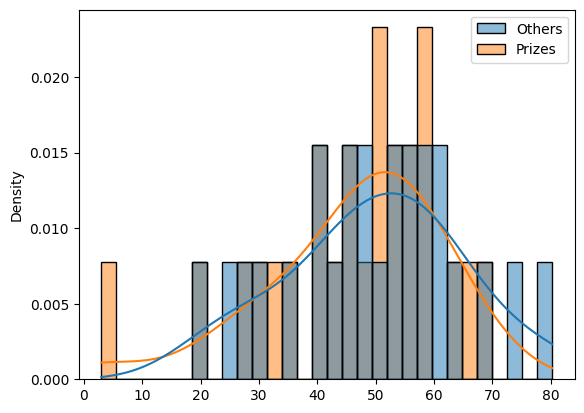

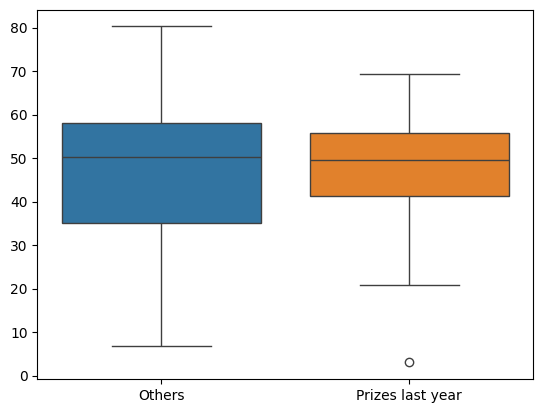

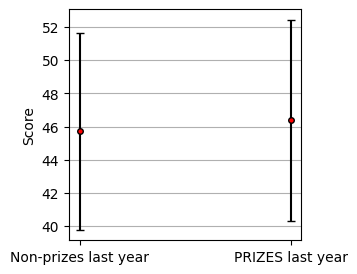

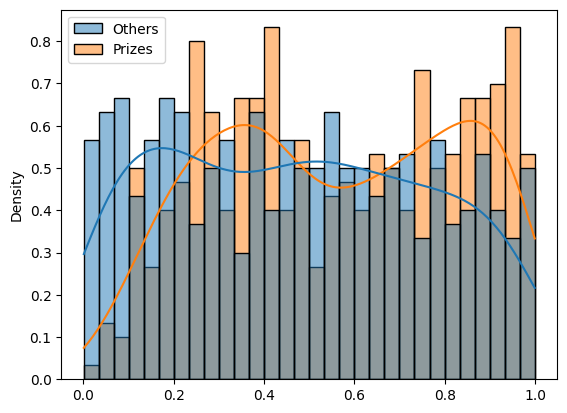

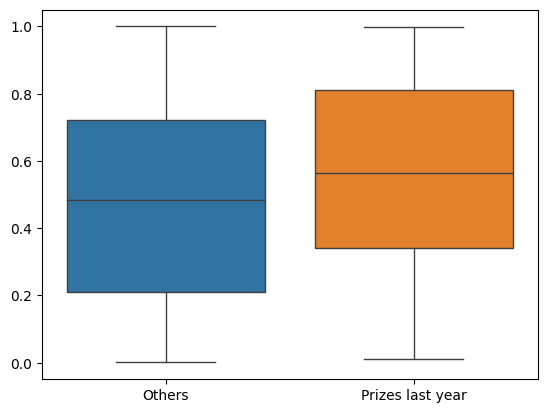

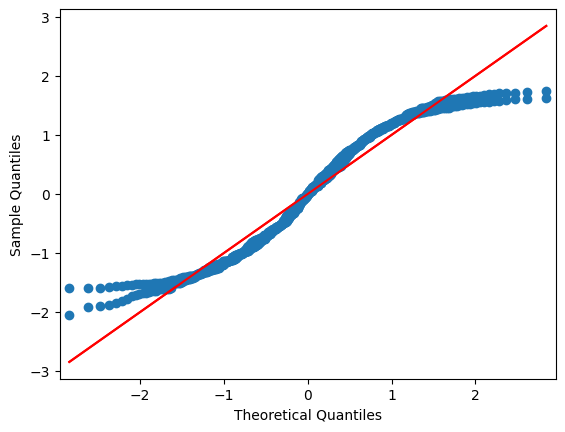

In [10]:
result = Cohort_Statistics.cohortStat(Cohort_Statistics.getMeanData(10, 23, 'Physics'))[1] 
result = Cohort_Statistics.cohortStat(Cohort_Statistics.getPercentileData())[1] 

### Вторая гипотеза

Напомню:  
$H_1$: Призеры прошлого года в среднем занимают более высокие места

#### Статистика

In [11]:
%%capture
from Cohort_Statistics import Cohort_Statistics

stat = Cohort_Statistics.cohortStat(Cohort_Statistics.getPercentileData())

resultList, result, histPlotFig, barPlotFig, qqOrCiFig = stat

#### Результат:

In [12]:
for line in resultList:
	print(line)

Mean of last year prizes' scores is 0.5625
Mean others' scores is 0.4769
    H_0: Actually MeanP == MeanO
    H_1: Not equal
 
Check criteria for a T-Test:
     | Shapiro-Wilk for norm. failed: One of the distributions is not normal
     Failed | Levene | Shapiro-Wilk 
 
Performing a KS-Test:
    p_value is 0.00000 
H_0 is false -> H_1 is ACCEPTED
 


Из чего делаем закономерные выводы и заносим их в README.py